In [29]:
import pandas as pd

In [30]:
dados_clientes = pd.read_json('/content/drive/MyDrive/Alura/Pandas/TelecomX_Data.json')

In [31]:
dados_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [32]:
dados_clientes.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [33]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [34]:
customer_normalizado = pd.json_normalize(dados_clientes['customer'])

In [35]:
customer_normalizado.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [36]:
customer_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [37]:
internet_normalizado = pd.json_normalize(dados_clientes['internet'])
phone_normalizado = pd.json_normalize(dados_clientes['phone'])
account_normalizado = pd.json_normalize(dados_clientes['account'])


In [38]:
df_final = pd.concat(
    [
        customer_normalizado,
        internet_normalizado,
        phone_normalizado,
        account_normalizado

    ],
    axis=1
)

In [39]:
df_final
df_final = df_final.merge(
    dados_clientes[['customerID', 'Churn']],
    left_index=True,
    right_index=True,
    how='left'
)

In [40]:
df_final.isna().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   InternetService   7267 non-null   object 
 6   OnlineSecurity    7267 non-null   object 
 7   OnlineBackup      7267 non-null   object 
 8   DeviceProtection  7267 non-null   object 
 9   TechSupport       7267 non-null   object 
 10  StreamingTV       7267 non-null   object 
 11  StreamingMovies   7267 non-null   object 
 12  PhoneService      7267 non-null   object 
 13  MultipleLines     7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [42]:
colunas = [
   'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'Contract', 'PaymentMethod',
    'gender', 'tenure', 'Churn'
]

In [43]:
df_final[colunas] = df_final[colunas].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-4025402415.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[colunas] = df_final[colunas].replace({'Yes': 1, 'No': 0})


In [44]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
0,Female,0,1,1,9,DSL,0,1,0,1,...,0,1,0,One year,1,Mailed check,65.6,593.3,0002-ORFBO,0
1,Male,0,0,0,9,DSL,0,0,0,0,...,1,1,1,Month-to-month,0,Mailed check,59.9,542.4,0003-MKNFE,0
2,Male,0,0,0,4,Fiber optic,0,0,1,0,...,0,1,0,Month-to-month,1,Electronic check,73.9,280.85,0004-TLHLJ,1
3,Male,1,1,0,13,Fiber optic,0,1,1,0,...,1,1,0,Month-to-month,1,Electronic check,98.0,1237.85,0011-IGKFF,1
4,Female,1,1,0,3,Fiber optic,0,0,0,1,...,0,1,0,Month-to-month,1,Mailed check,83.9,267.4,0013-EXCHZ,1


In [45]:
df_final[colunas].info('SeniorCitizen')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Partner           7267 non-null   int64 
 1   Dependents        7267 non-null   int64 
 2   PhoneService      7267 non-null   int64 
 3   MultipleLines     7267 non-null   object
 4   OnlineSecurity    7267 non-null   object
 5   OnlineBackup      7267 non-null   object
 6   DeviceProtection  7267 non-null   object
 7   TechSupport       7267 non-null   object
 8   StreamingTV       7267 non-null   object
 9   StreamingMovies   7267 non-null   object
 10  PaperlessBilling  7267 non-null   int64 
 11  Contract          7267 non-null   object
 12  PaymentMethod     7267 non-null   object
 13  gender            7267 non-null   object
 14  tenure            7267 non-null   int64 
 15  Churn             7267 non-null   object
dtypes: int64(5), object(11)
memory usage: 908.5+ KB


In [46]:
df_final.groupby('Churn')[['tenure', 'Charges.Monthly']].mean()

,tenure,Charges.Monthly
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332
,31.571429,63.412277


In [47]:
df_final.groupby(['Contract', 'Churn'])[['tenure', 'Charges.Monthly']].mean()

tenure  Charges.Monthly
Contract       Churn                            
Month-to-month 0      21.033333        61.462635
               1      14.016918        73.019396
                      16.807692        64.738077
One year       0      41.674063        62.508148
               1      44.963855        85.050904
                      46.869565        71.148913
Two year       0      56.602914        60.012477
               1      61.270833        86.777083
                      56.895833        52.407292

In [48]:
df_final['Churn'].dtype

dtype('O')

In [49]:
df_final['Churn'] = pd.to_numeric(df_final['Churn'], errors='coerce')

In [50]:
df_final['Churn'].dtype

dtype('float64')

In [51]:
colunas_servicos = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

In [52]:
for col in colunas_servicos:
    print(f'\n### {col}')
    print('Base:')
    print(df_final[col].value_counts())
    print('\nTaxa de churn:')
    print(df_final.groupby(col)['Churn'].mean())


### PhoneService
Base:
PhoneService
1    6560
0     707
Name: count, dtype: int64

Taxa de churn:
PhoneService
0    0.249267
1    0.267096
Name: Churn, dtype: float64

### MultipleLines
Base:
MultipleLines
0                   3495
1                   3065
No phone service     707
Name: count, dtype: int64

Taxa de churn:
MultipleLines
0                   0.250442
1                   0.286099
No phone service    0.249267
Name: Churn, dtype: float64

### OnlineSecurity
Base:
OnlineSecurity
0                      3608
1                      2078
No internet service    1581
Name: count, dtype: int64

Taxa de churn:
OnlineSecurity
0                      0.417667
1                      0.146112
No internet service    0.074050
Name: Churn, dtype: float64

### OnlineBackup
Base:
OnlineBackup
0                      3182
1                      2504
No internet service    1581
Name: count, dtype: int64

Taxa de churn:
OnlineBackup
0                      0.399288
1                      0.215315
N

In [53]:
df_final.groupby(['PaymentMethod', 'Contract'])['Churn'].value_counts()

PaymentMethod              Contract        Churn
Bank transfer (automatic)  Month-to-month  0.0      388
                                           1.0      201
                           One year        0.0      353
                                           1.0       38
                           Two year        0.0      545
                                           1.0       19
Credit card (automatic)    Month-to-month  0.0      365
                                           1.0      178
                           One year        0.0      357
                                           1.0       41
                           Two year        0.0      568
                                           1.0       13
Electronic check           Month-to-month  1.0      994
                                           0.0      856
                           One year        0.0      283
                                           1.0       64
                           Two year        0.0      155
                                           1.0       13
Mailed check               Month-to-month  0.0      611
                                           1.0      282
                           One year        0.0      314
                                           1.0       23
                           Two year        0.0      379
                                           1.0        3
Name: count, dtype: int64

In [54]:
df_final.groupby(['PaymentMethod', 'Contract'])['Churn'].mean()

PaymentMethod              Contract      
Bank transfer (automatic)  Month-to-month    0.341256
                           One year          0.097187
                           Two year          0.033688
Credit card (automatic)    Month-to-month    0.327808
                           One year          0.103015
                           Two year          0.022375
Electronic check           Month-to-month    0.537297
                           One year          0.184438
                           Two year          0.077381
Mailed check               Month-to-month    0.315789
                           One year          0.068249
                           Two year          0.007853
Name: Churn, dtype: float64

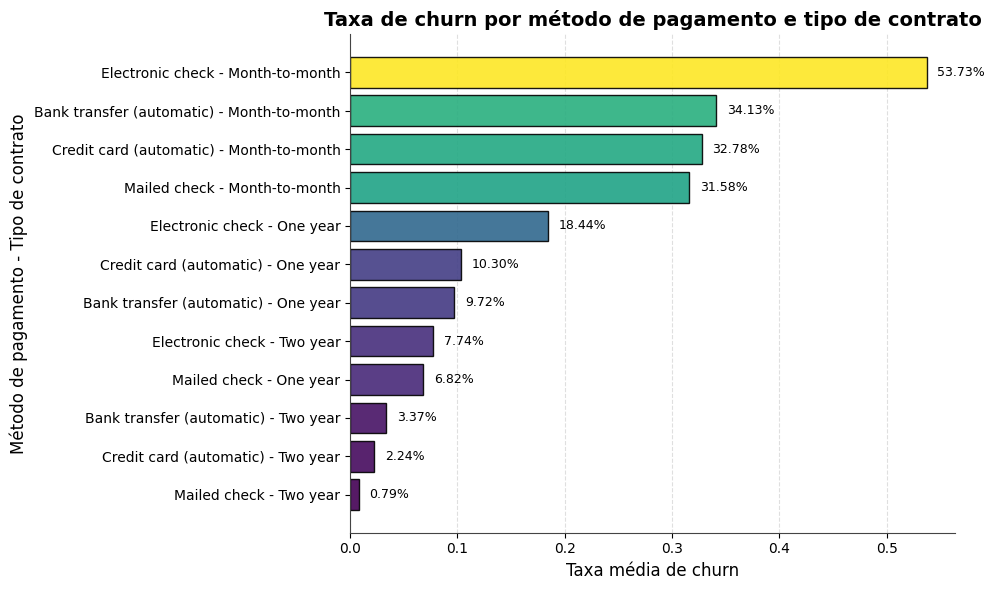

In [55]:
import matplotlib.pyplot as plt

# Tabela com taxa de churn por método de pagamento e tipo de contrato
churn_pagamento_contrato = (
    df_final
        .groupby(['PaymentMethod', 'Contract'])['Churn']
        .mean()
        .reset_index()
)

# ordenar pela taxa de churn para facilitar a leitura
churn_pagamento_contrato = churn_pagamento_contrato.sort_values('Churn', ascending=True)

# Criar rótulos combinando método e contrato
churn_pagamento_contrato['Metodo_Contrato'] = (
    churn_pagamento_contrato['PaymentMethod'] + ' - ' + churn_pagamento_contrato['Contract']
)

# Figura e eixo
fig, ax = plt.subplots(figsize=(10, 6))
cores = plt.cm.viridis(
    (churn_pagamento_contrato['Churn'] - churn_pagamento_contrato['Churn'].min()) /
    (churn_pagamento_contrato['Churn'].max() - churn_pagamento_contrato['Churn'].min())
)

# Gráfico de barras horizontal
ax.barh(
    churn_pagamento_contrato['Metodo_Contrato'],
    churn_pagamento_contrato['Churn'],
    color=cores,
    edgecolor='black',
    alpha=0.9
)

# Título e rótulos
ax.set_title(
    'Taxa de churn por método de pagamento e tipo de contrato',
    fontsize=14,
    fontweight='bold'
)
ax.set_xlabel('Taxa média de churn', fontsize=12)
ax.set_ylabel('Método de pagamento - Tipo de contrato', fontsize=12)

# Grid discreto para ajudar na leitura
ax.xaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionar rótulos de valor nas barras
for i, valor in enumerate(churn_pagamento_contrato['Churn']):
    ax.text(
        x=valor + 0.01,
        y=i,
        s=f'{valor:.2%}',
        va='center',
        fontsize=9
    )

# Estilizar bordas do gráfico (frame)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_color('#444444')
ax.spines['bottom'].set_color('#444444')

plt.tight_layout()
plt.show()


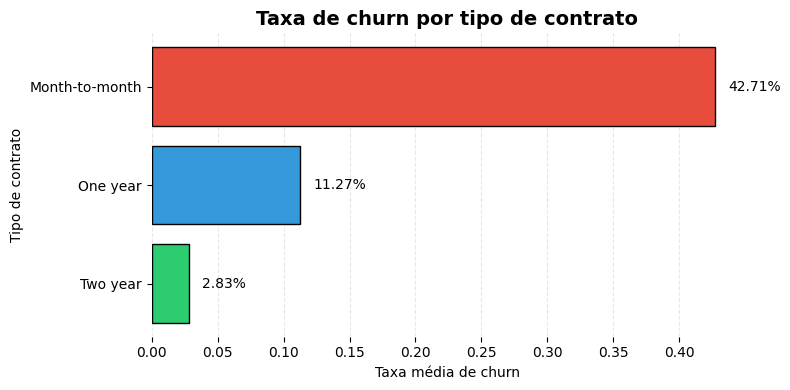

In [56]:
import matplotlib.pyplot as plt

# 1. Tabela com taxa de churn por tipo de contrato
media_churn_contrato = (
    df_final
      .groupby('Contract')['Churn']
      .mean()
      .sort_values(ascending=True)
)

# 2. figura e eixo
fig, ax = plt.subplots(figsize=(8, 4))

# 3. Gráfico de barras horizontal
cores = ['#2ecc71', '#3498db', '#e74c3c']  # good, medium, high churn
ax.barh(
    media_churn_contrato.index,
    media_churn_contrato.values,
    color=cores,
    edgecolor='black'
)

# 4. Título e rótulos
ax.set_title('Taxa de churn por tipo de contrato',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Taxa média de churn')
ax.set_ylabel('Tipo de contrato')

# 5. Grid leve no eixo x
ax.xaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

for i, v in enumerate(media_churn_contrato.values):
    ax.text(
        v + 0.01,
        i,
        f'{v:.2%}',
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()



## Conclusões

- A análise dos dados de clientes da TelecomX indica que a maior parte da base não cancela o serviço, porém existe um grupo específico com risco elevado de churn: os clientes com contrato Month‑to‑month. Nesse tipo de contrato, aproximadamente 42% dos clientes cancelam, o que significa que quase metade dessa base deixa a empresa, enquanto contratos de 1 e 2 anos apresentam taxas de churn bem menores. Essa diferença sugere que acordos de maior fidelização funcionam como um fator de retenção importante. Diante disso, recomenda‑se que a TelecomX concentre esforços em clientes Month‑to‑month, oferecendo incentivos para migração para planos anuais ou bienais e avaliando benefícios adicionais (como descontos ou vantagens exclusivas) que tornem a permanência mais atrativa para esse grupo.

